# Milestone 1 - Independent Project

## Author - Dustin Burnham



## Instructions

1. Generate a clear statement problem and provide the location for the datasetyou use.
2. Provide a clear solution to the problem for a non-technical audience.
3. Visually explore the data to generate insight and include summary statistics.
4. Use an appropriate statistical analysis method.
5. Prepare the data via cleaning, normalization, encoding, et cetera.
6. Generate and evaluate a working model (hypothesis, linear, or time series).
7. Draw direct inferences and conclusions from model results.
8. Use professional coding standards and techniques including:

    - explanatory markdown text
    - proper code comments
    - functions to minimize redundant code
    - minimize hard-coded variables

### Note
Please use the <a class="icon-pdf" title="Independent Project Rubric" href="https://library.startlearninglabs.uw.edu/DATASCI410/Handouts/DATASCI%20410%20Independent%20Project%20Rubric.pdf" target="_blank" rel="noopener">Rubric</a> as a general guide for your project.

# Abstract
## Problem
-The problem I will investigate is how various variables related to housing most affect a houses value.  I will be using king county housing data provided at:
https://library.startlearninglabs.uw.edu/DATASCI410/Handouts/DATASCI%20410%20King%20County%20Housing%20Project.docx

I will begin by doing the following:
1.  Exploring the data for variables of interest using statistics and data visualizations.
2.  Clean the data.
3.  Develop a linear regression model to predict housing prices by variable.
4.  Make predictions of housing prices.


## Conclusion
By looking at the relationship between price and other variables using correlation, I was able to pick out the variables that had an affect on price.  From here I was able to further inspect these relationships by using a variety of different plots which included kernel density, heat maps, and scatter plots as seen down below.  The obvious relationships were expected; the variables that showed a larger house showed a larger increase in price.  These variables included bedrooms, square footage variables, and bathrooms.  But I didn't just look at the plots, below I included the correlation values between each of these variables and price to confirm the observations.  Next, I used a linear regression model (since the predictor and target variables were numeric) to predict price in the future.  I normalized the numeric data that was deemed relevant from correlation tests, split my data into 70% training, 30% testing, and trained my model.  Next I generated beta coefficients and intercept for my model, predictions, and r-squared for model accuracy measure.  My r-squared was 0.62, which I read is decent.  Below this information, I plotted a random subset of predictions and the actual data to see how well my predictions match the actual targets, and it looks really good.  The variables that had the strongest affect on the price of a home were the three square footage variables.  Something that I found interesting was the fact that bedrooms, bathrooms, and grade all had decently large positive correlation, but their predictive value was not as large as the square footage variables.  I determined the predictive value of these variables by looking at the beta-coefficients of each varialbe.  The larger the coefficient, the larger the impact on the model.  The beta values are listed where they are computed.

All in all, this notebook's plots and statistics show the variables that have a strong relationship with price, and how we can predict future housing prices given these variables in the future.

In [1]:
# Load needed packages
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import random

from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from copy import deepcopy

In [2]:
# Location of dataset
# King county housing data set
housing = pd.read_csv("kc_house_data.csv")

In [3]:
# Check out the data
housing.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0           0     0     ...          7        1180   
1      7242     2.0           0     0     ...          7        2170   
2     10000     1.0           0     0     ...          6         770   
3      5000     1.0           0     0     ...          7        1050   
4      8080     1.0           0     0     ...          8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [4]:
# View some descriptive statistics
housing.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [5]:
housing.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
# Numeric columns
columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
          'view', 'sqft_above', 'sqft_basement', 'yr_built','zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [7]:
# Calculate a correlation matrix
housing_corr = housing.corr()

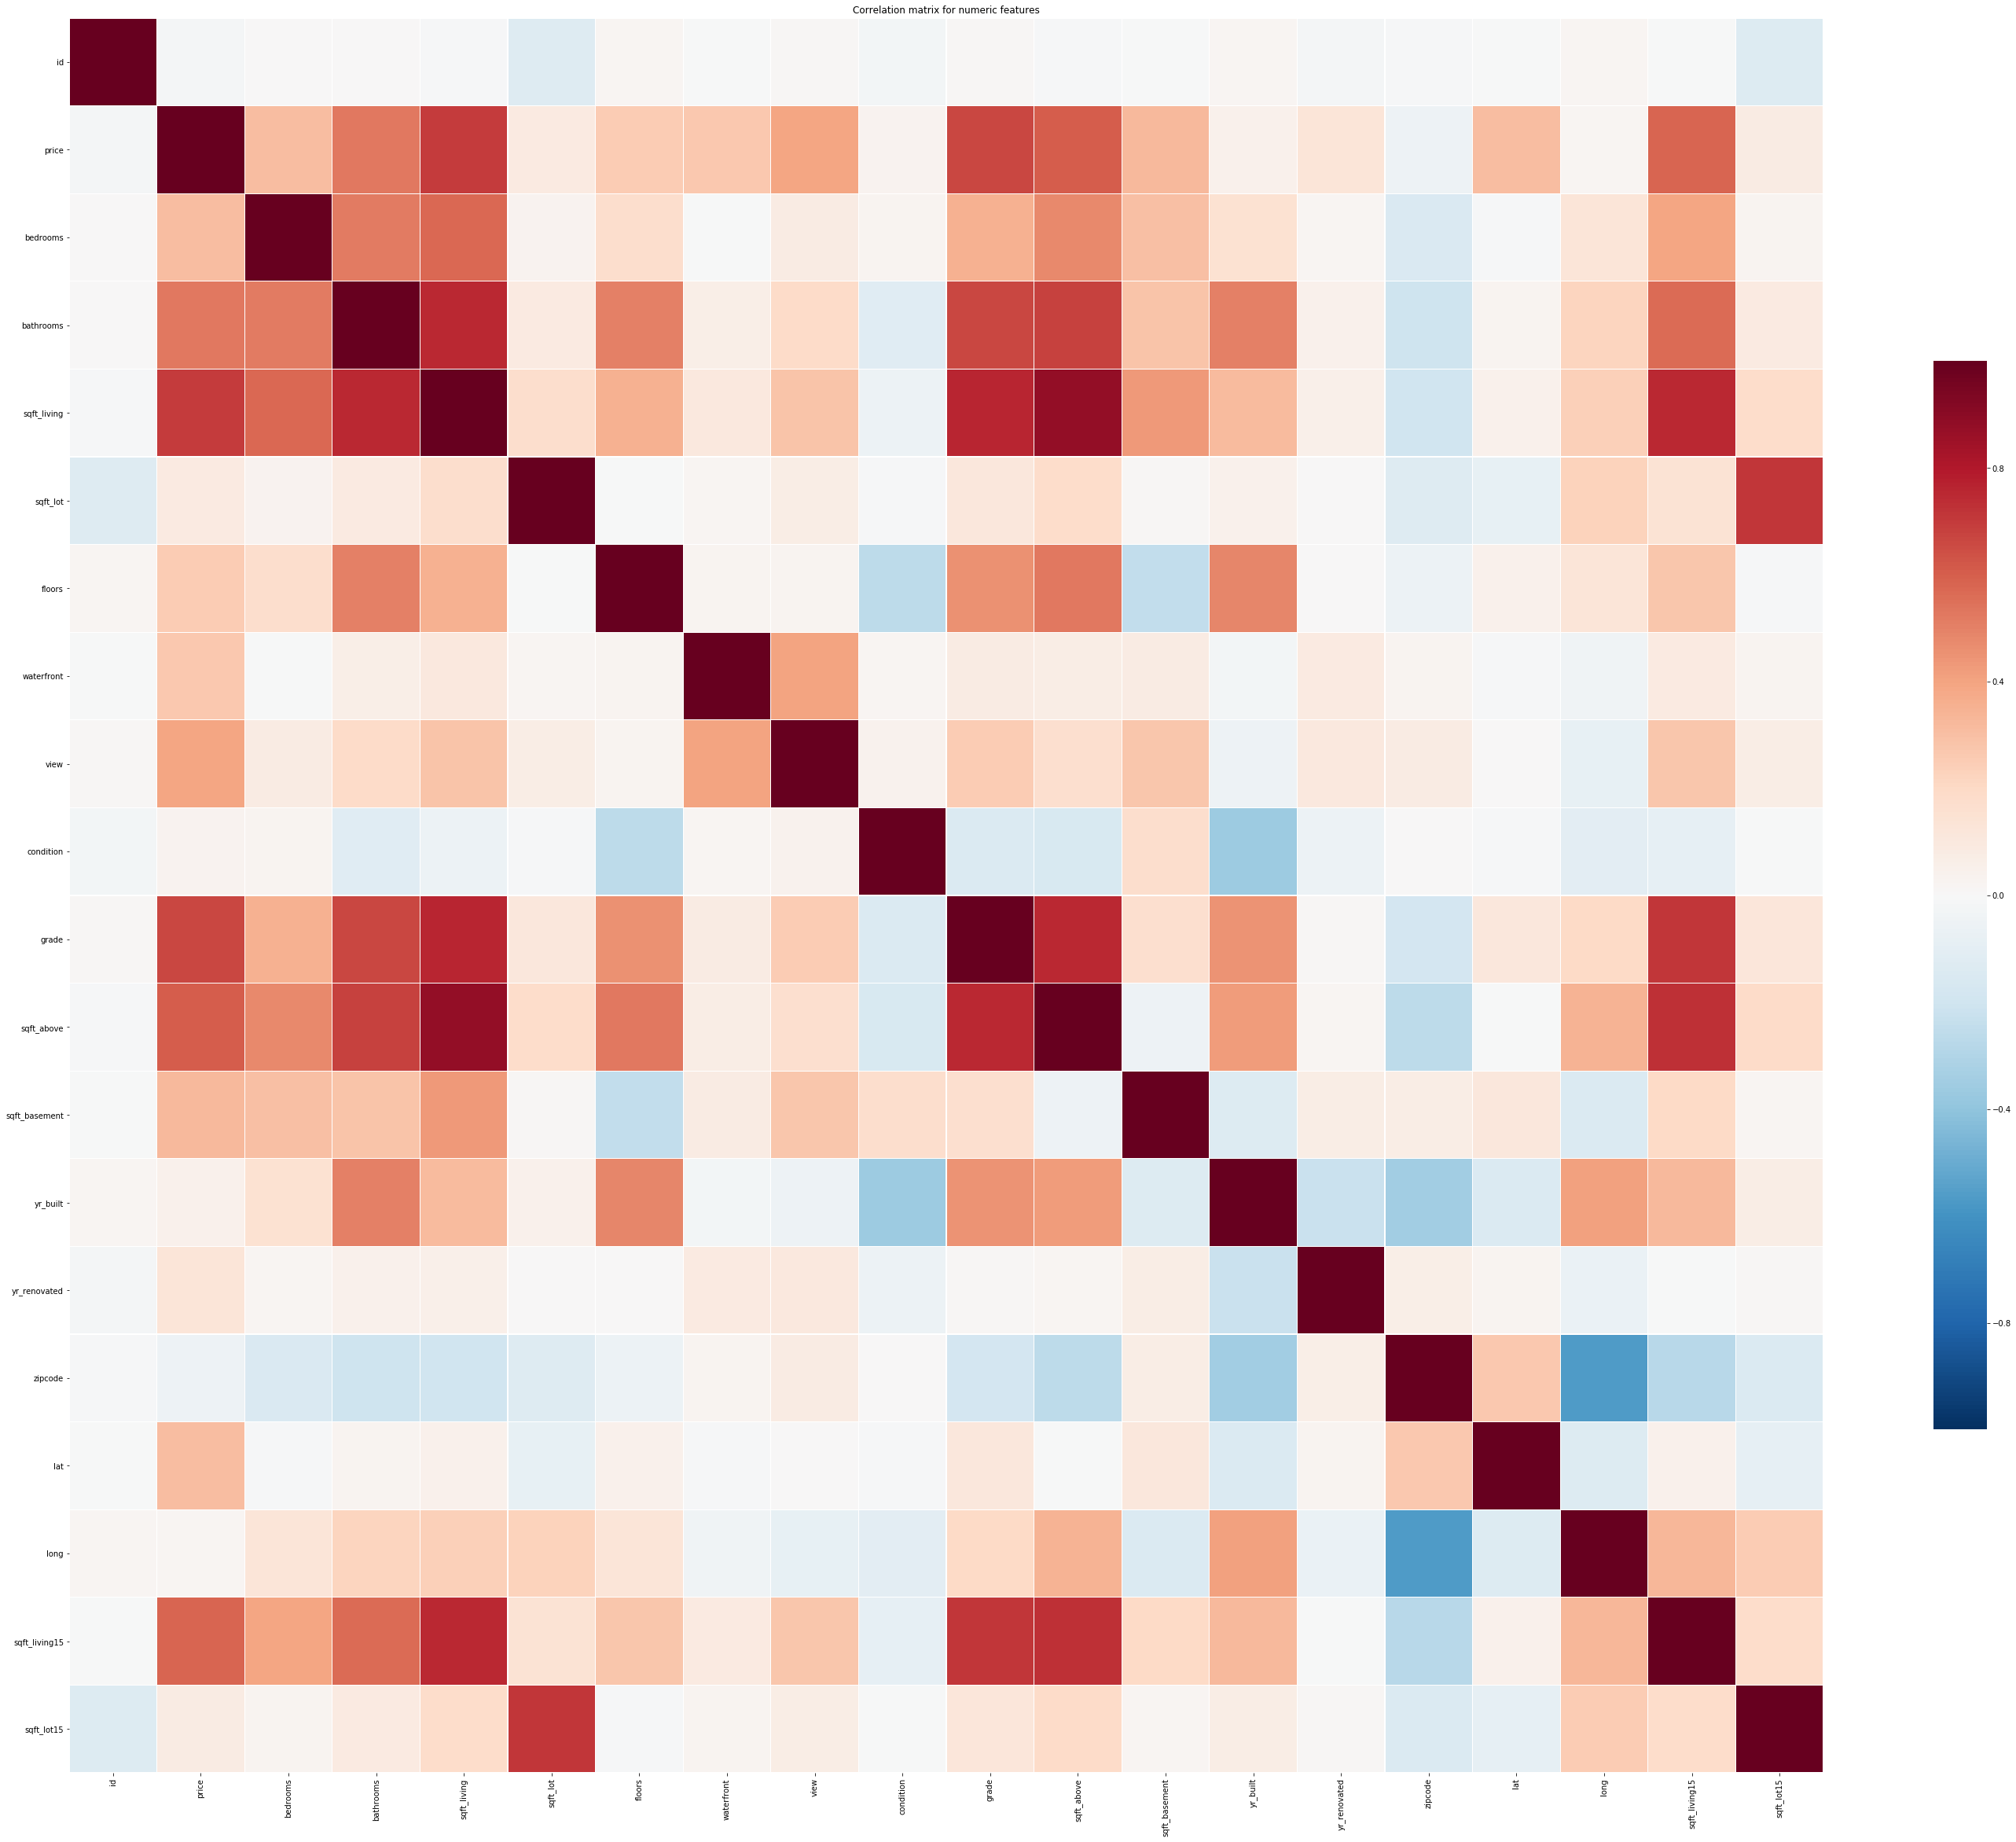

In [8]:
# Display the correlation matrix using a heat map
plt.figure(figsize=(50,50))
sns.heatmap(housing.corr(), vmax=1, vmin=-1, center=0, cmap="RdBu_r",
            square=True, linewidths=.25, cbar_kws={"shrink": .5})
plt.title('Correlation matrix for numeric features')
plt.yticks(rotation='horizontal')
plt.xticks(rotation='vertical')
plt.show()

In [9]:
# Show correlation
print(housing_corr['price'])

id              -0.016762
price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64


In [10]:
def replace_outliers(df, col):
    """
    Input: dataframe
    Output: dataframe where the outliers have been replaced by the median of 
    that column.
    
    I will check to see which values meet the conditions that they fall
    between +- 3 standardard deviations of the means.  i will use the tilda
    to pick out the outliers and replace them with the median.
    """
    
    high = np.mean(df[col]) + 3 * np.std(df[col])
    low = np.mean(df[col]) - 3 * np.std(df[col])
    FlagGood = (df.loc[:, col] < high) & (df.loc[:, col] > low)
    df.loc[~FlagGood,col] = np.float("NaN")
    return(df)

In [12]:
# Replace outliers of dataset.  Set equal to nan, drop those rows.
for col in columns:
    housing = replace_outliers(housing, col)
    
housing = housing.dropna()

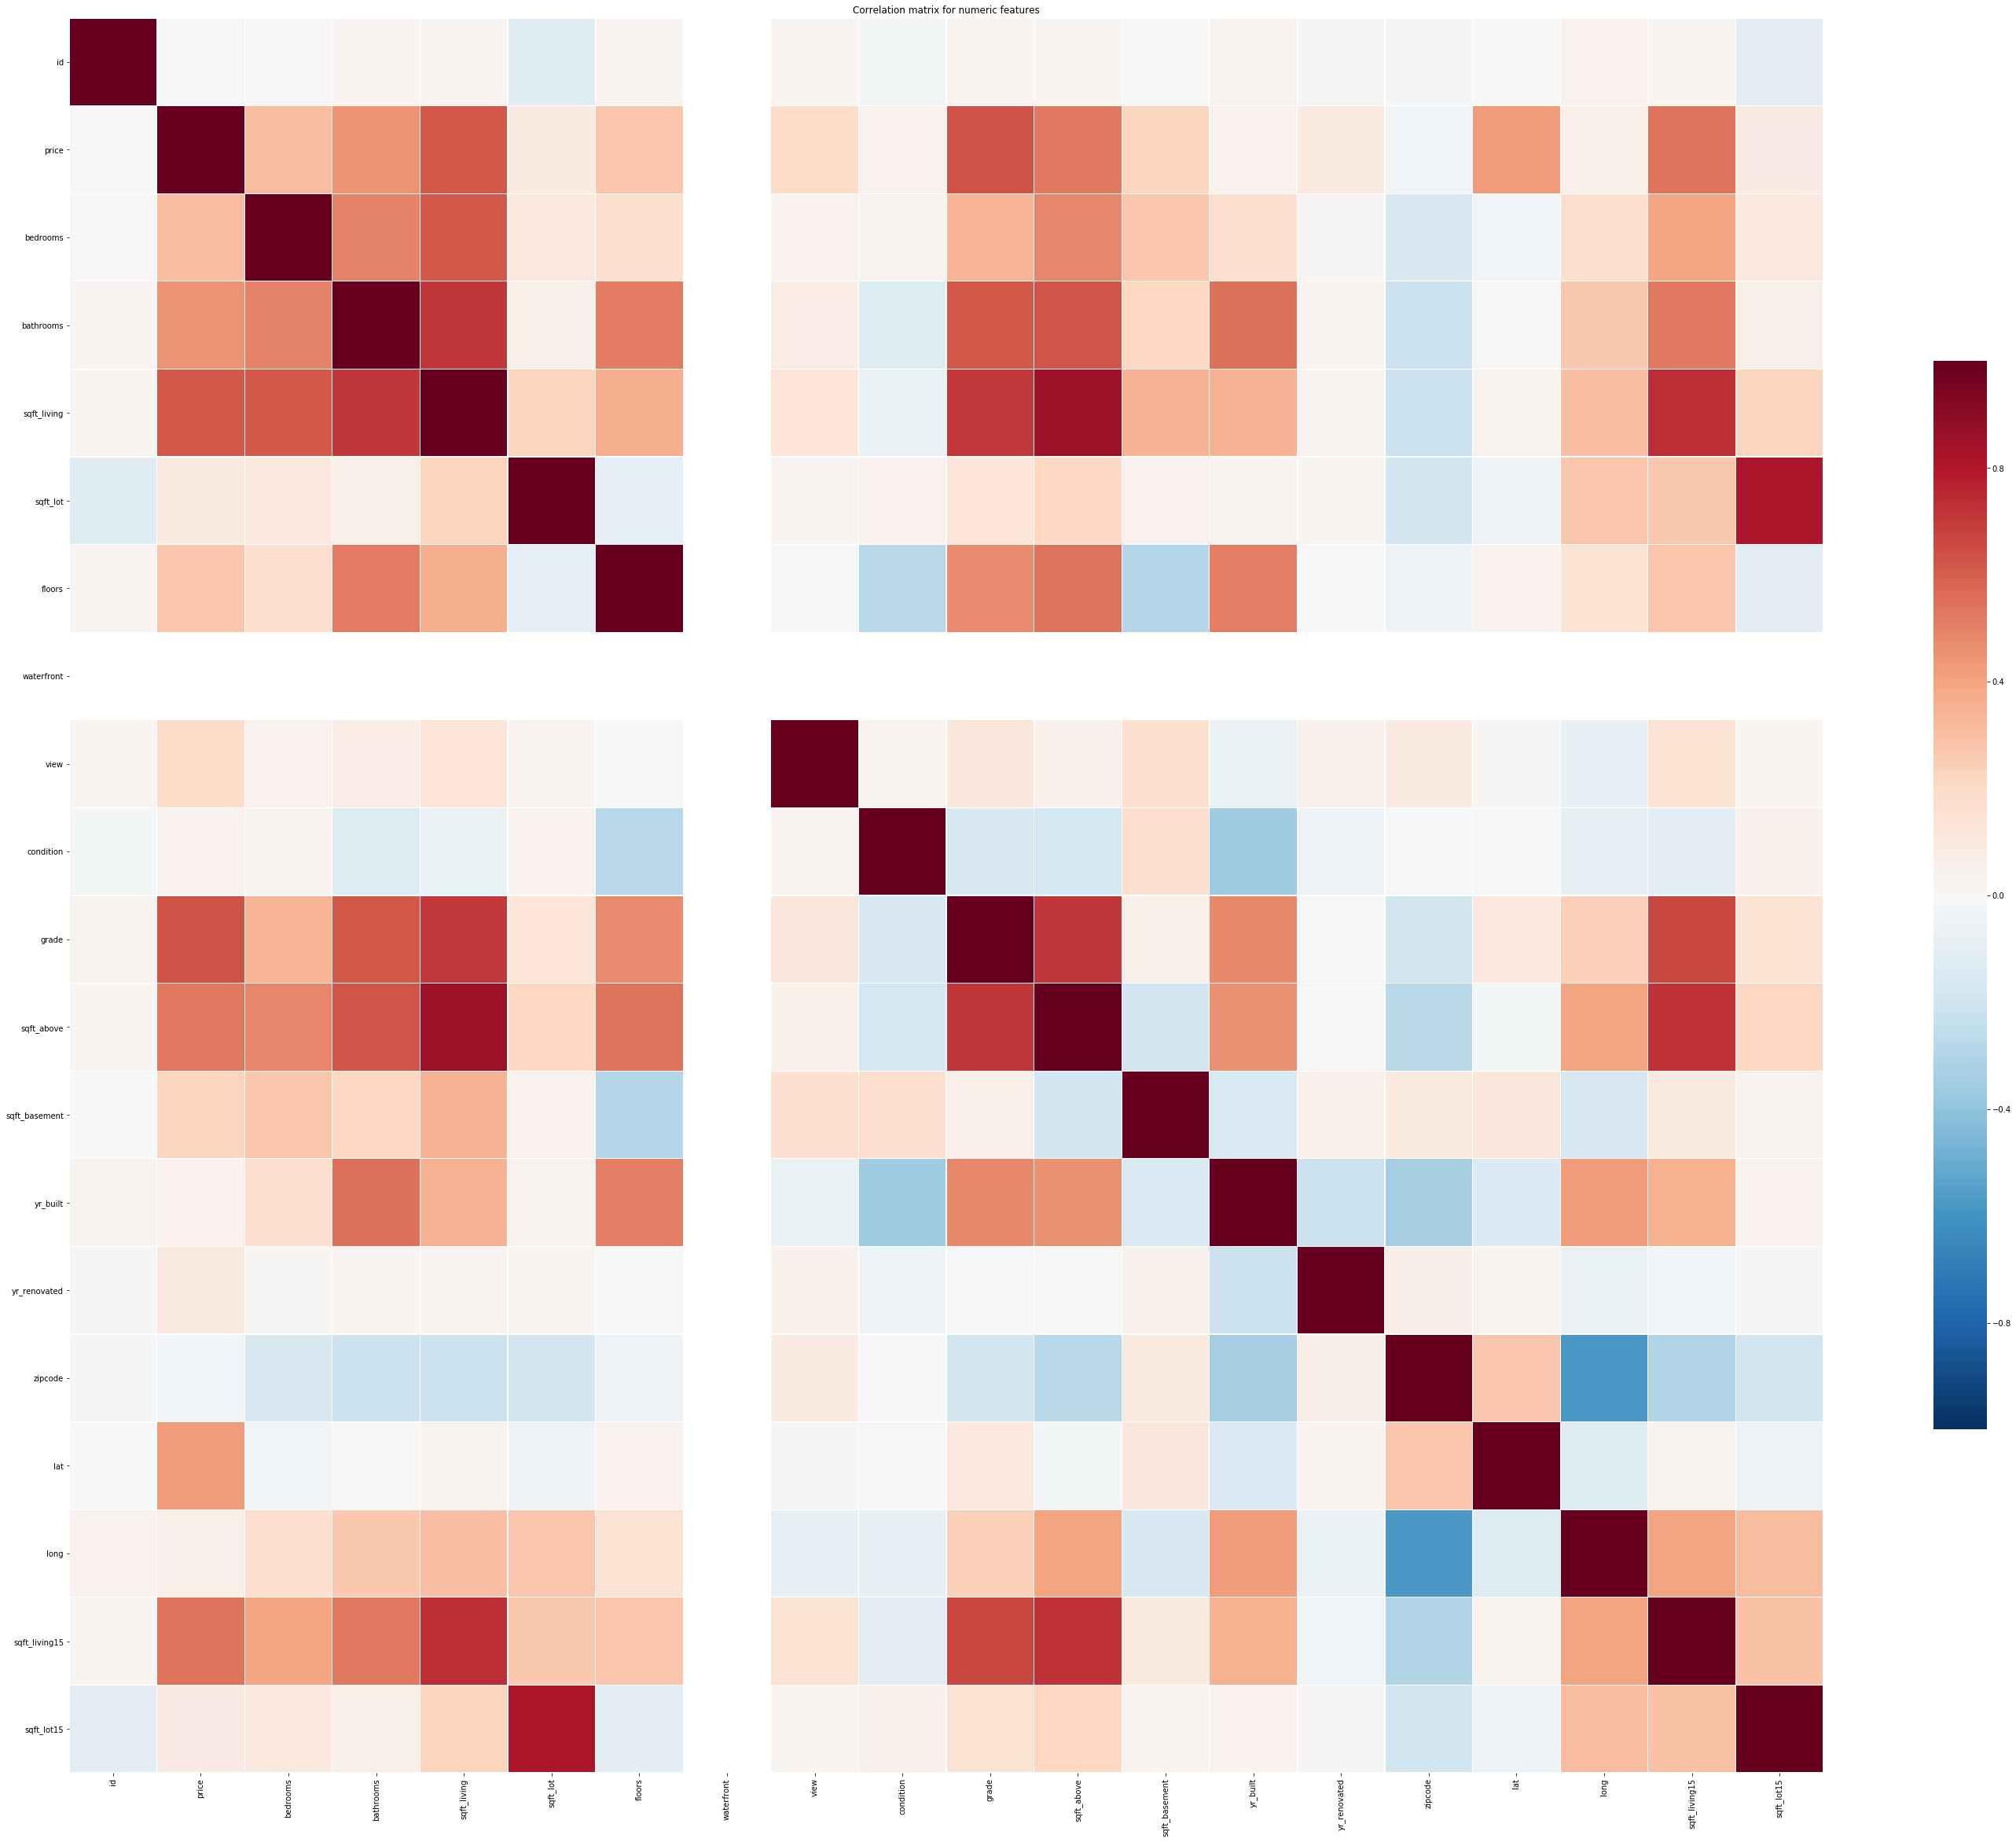

In [13]:
# New heat map
plt.figure(figsize=(50,50))
sns.heatmap(housing.corr(), vmax=1, vmin=-1, center=0, cmap="RdBu_r",
            square=True, linewidths=.25, cbar_kws={"shrink": .5})
plt.title('Correlation matrix for numeric features')
plt.yticks(rotation='horizontal')
plt.xticks(rotation='vertical')
plt.show()

In [14]:
# new correlations
print(housing.corr()['price'])

id               0.005760
price            1.000000
bedrooms         0.305181
bathrooms        0.451952
sqft_living      0.622993
sqft_lot         0.092045
floors           0.278594
waterfront            NaN
view             0.194854
condition        0.043502
grade            0.633400
sqft_above       0.529685
sqft_basement    0.223847
yr_built         0.042276
yr_renovated     0.096406
zipcode         -0.033859
lat              0.426264
long             0.057387
sqft_living15    0.542473
sqft_lot15       0.084076
Name: price, dtype: float64


I will use varialbes that have an absolute correlation with price greater than 0.3.

In [15]:
good_vars = housing.corr().loc[abs(housing_corr['price']) > 0.3, 'price'].index

In [16]:
# Select variables with corellation > +- 0.3
good_housing = housing[good_vars]

Check out the data

In [17]:
good_housing.dtypes

price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
view             float64
grade              int64
sqft_above       float64
sqft_basement    float64
lat              float64
sqft_living15    float64
dtype: object

In [18]:
good_housing.head()

price  bedrooms  bathrooms  sqft_living  view  grade  sqft_above  \
0  221900.0       3.0       1.00       1180.0   0.0      7      1180.0   
1  538000.0       3.0       2.25       2570.0   0.0      7      2170.0   
2  180000.0       2.0       1.00        770.0   0.0      6       770.0   
3  604000.0       4.0       3.00       1960.0   0.0      7      1050.0   
4  510000.0       3.0       2.00       1680.0   0.0      8      1680.0   

   sqft_basement      lat  sqft_living15  
0            0.0  47.5112         1340.0  
1          400.0  47.7210         1690.0  
2            0.0  47.7379         2720.0  
3          910.0  47.5208         1360.0  
4            0.0  47.6168         1800.0

In [19]:
good_housing.tail()

price  bedrooms  bathrooms  sqft_living  view  grade  sqft_above  \
21608  360000.0       3.0       2.50       1530.0   0.0      8      1530.0   
21609  400000.0       4.0       2.50       2310.0   0.0      8      2310.0   
21610  402101.0       2.0       0.75       1020.0   0.0      7      1020.0   
21611  400000.0       3.0       2.50       1600.0   0.0      8      1600.0   
21612  325000.0       2.0       0.75       1020.0   0.0      7      1020.0   

       sqft_basement      lat  sqft_living15  
21608            0.0  47.6993         1530.0  
21609            0.0  47.5107         1830.0  
21610            0.0  47.5944         1020.0  
21611            0.0  47.5345         1410.0  
21612            0.0  47.5941         1020.0

I will use a scatter matrix to view the relationships.  I will focus on those relationships with price.  

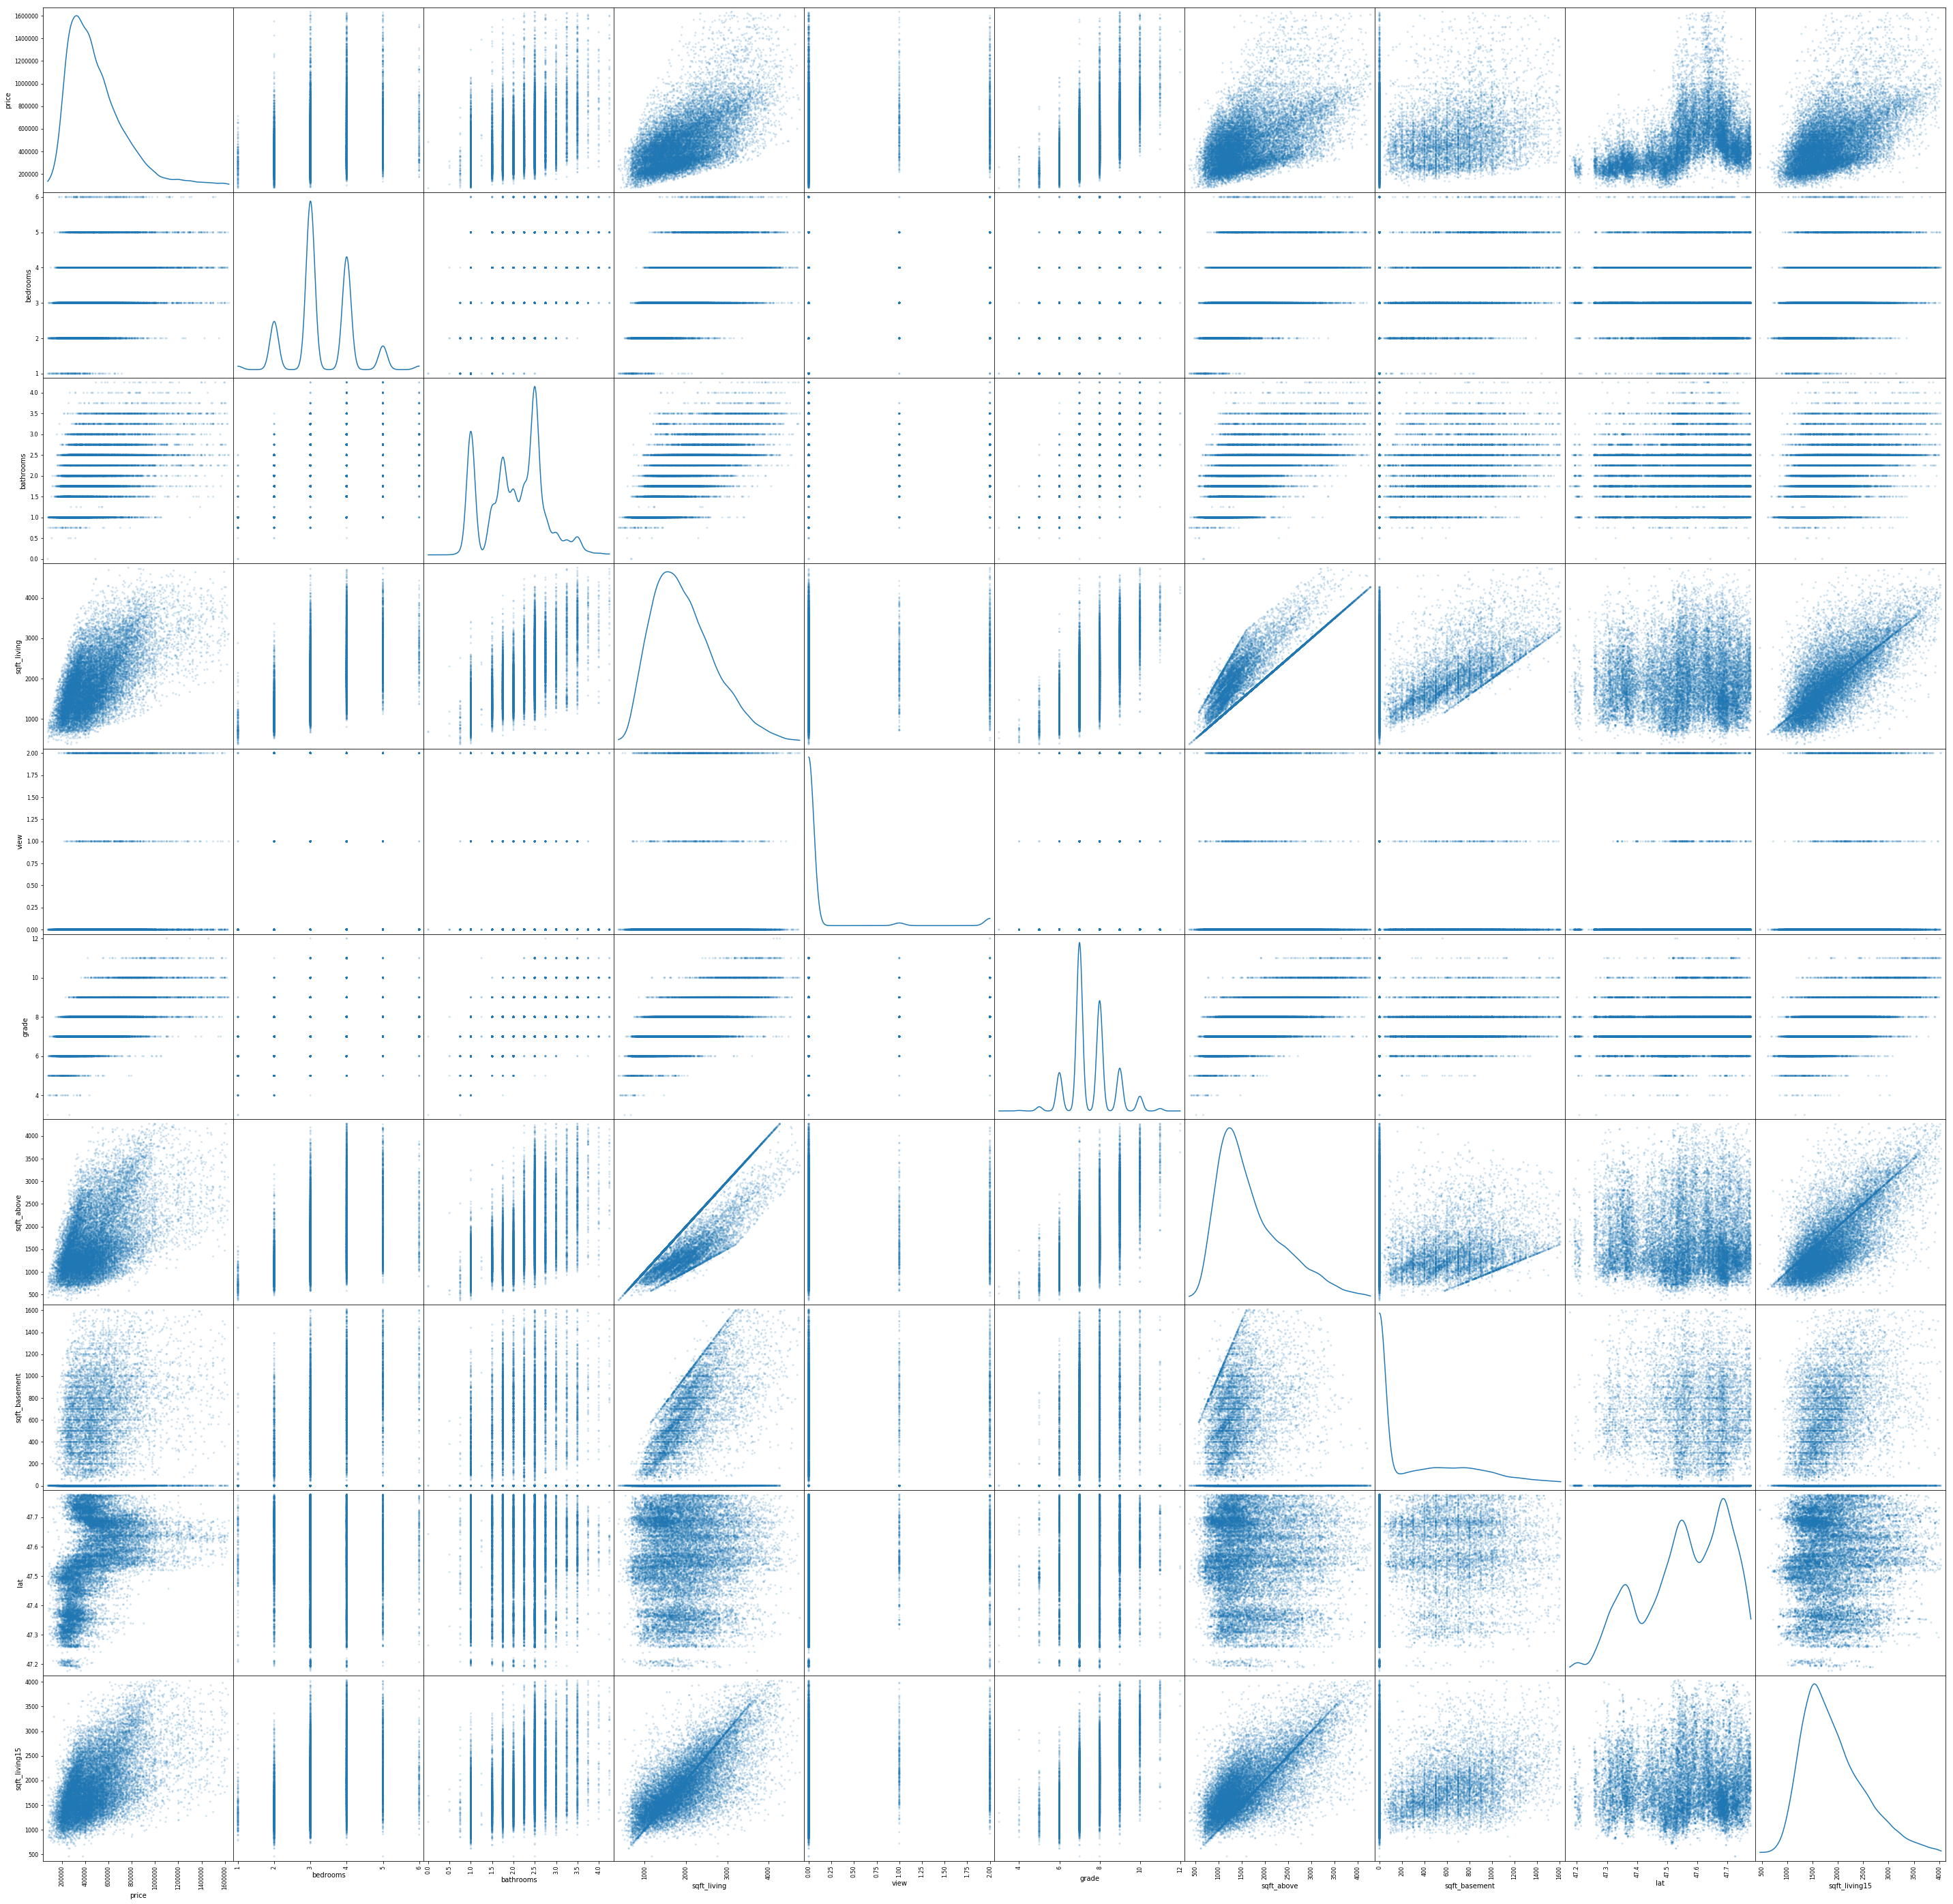

In [20]:
scatter_matrix(good_housing, alpha=0.2, figsize=(50, 50), diagonal='kde')
plt.show()

### Close-up of relationships
I will used seaborn kernel density plots and overlay low alpha scatter plots to get a better idea of the relationship without overcrowding of data.

/Users/dusty/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


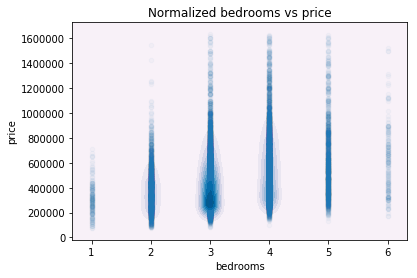

/Users/dusty/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


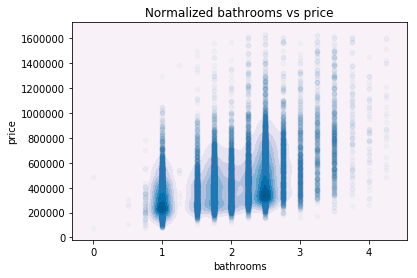

/Users/dusty/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


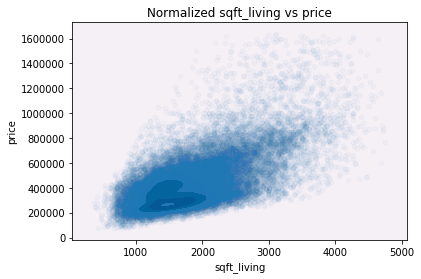

/Users/dusty/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
/Users/dusty/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/Users/dusty/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/Users/dusty/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/_kernel_base.py:513: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
/Users/dusty/anaconda3/lib/python3.6/site-packages/matplo

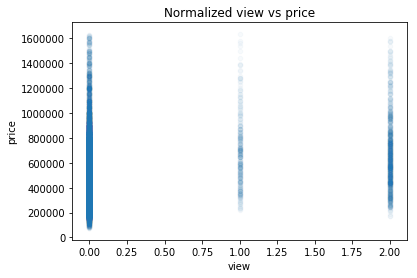

/Users/dusty/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


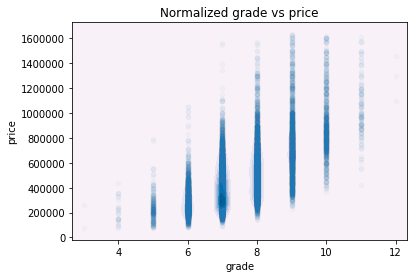

/Users/dusty/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


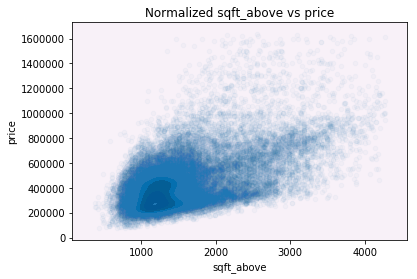

/Users/dusty/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


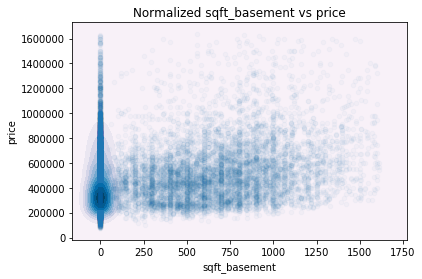

/Users/dusty/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


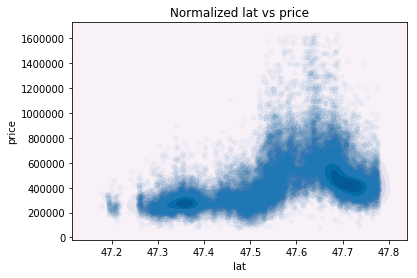

/Users/dusty/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


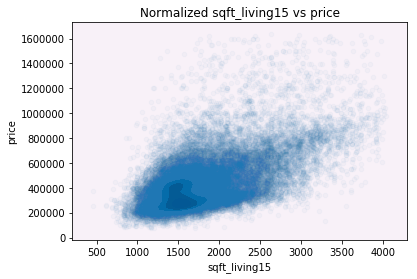

In [21]:
for col in good_vars[1:]:
    ax = sns.kdeplot(good_housing[[col, 'price']], shade = True, cmap = 'PuBu')
    good_housing.plot.scatter(x = col, y = 'price', ax = ax, alpha=0.03)
    plt.xlabel(col)
    plt.ylabel('price')
    title = "Normalized " + col + " vs price"
    plt.title(title)
    plt.show()

### Thoughts on correlations:
All of these variables have some correlation with price numerically, but some have stronger relationships than others.  For example, grade and square feet both increase price based off of the above plots.  Another interesting relationship is the relationship with latitude.  We see a spike in the middle of King county, where Seattle is!

In [22]:
def normalize(X, names): 
    """
    input: 
        X: Pandas Data Frame that will be min-max normalized
        names: column name
        
    Output:
        Y: Normalized data frame
    """
    N, m = X.shape
    Y = np.zeros([N, m])
    
    for i in range(m):
        name = names[i]
        mX = min(X.loc[:,name])
        Y[:,i] = (X.loc[:,name] - mX) / (max(X.loc[:,name]) - mX)
    
    return pd.DataFrame(Y, columns=names)

### Normalize Data for building a model

In [23]:
norm_housing = normalize(good_housing, good_housing.columns)

In [24]:
norm_housing.head()

price  bedrooms  bathrooms  sqft_living  view     grade  sqft_above  \
0  0.094106       0.4   0.235294     0.184932   0.0  0.444444    0.207692   
1  0.296605       0.4   0.529412     0.502283   0.0  0.444444    0.461538   
2  0.067265       0.2   0.235294     0.091324   0.0  0.333333    0.102564   
3  0.338885       0.6   0.705882     0.363014   0.0  0.444444    0.174359   
4  0.278668       0.4   0.470588     0.299087   0.0  0.555556    0.335897   

   sqft_basement       lat  sqft_living15  
0       0.000000  0.556886       0.245810  
1       0.248447  0.905855       0.343575  
2       0.000000  0.933965       0.631285  
3       0.565217  0.572854       0.251397  
4       0.000000  0.732535       0.374302

/Users/dusty/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


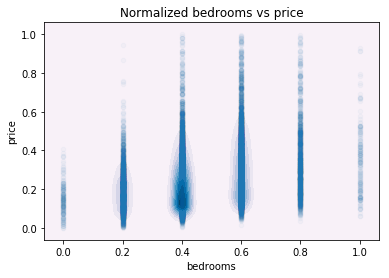

/Users/dusty/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


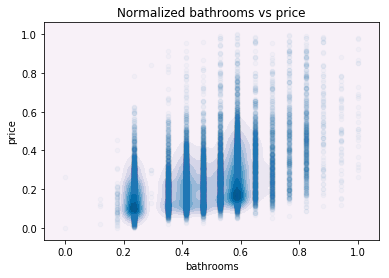

/Users/dusty/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


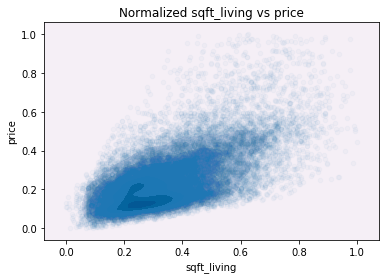

/Users/dusty/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
/Users/dusty/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/Users/dusty/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/Users/dusty/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/_kernel_base.py:513: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
/Users/dusty/anaconda3/lib/python3.6/site-packages/matplo

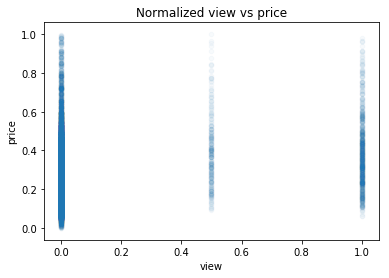

/Users/dusty/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


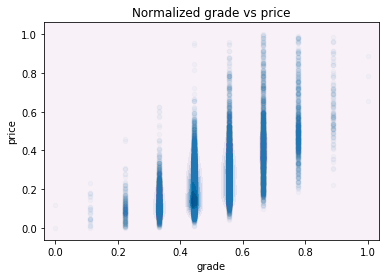

/Users/dusty/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


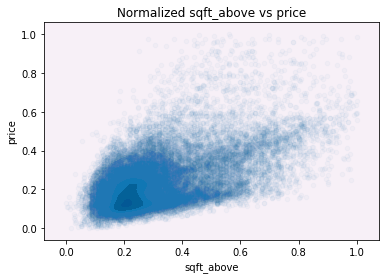

/Users/dusty/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


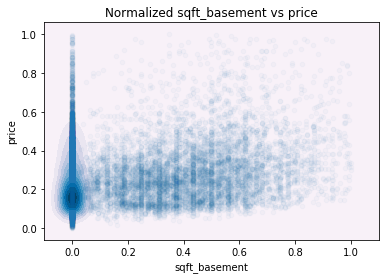

/Users/dusty/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


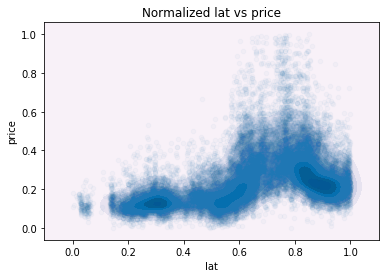

/Users/dusty/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


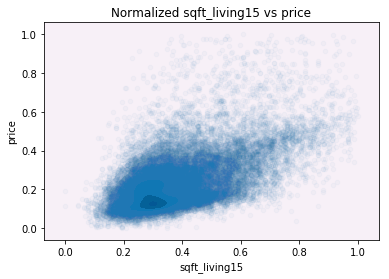

In [25]:
for col in good_vars[1:]:
    ax = sns.kdeplot(norm_housing[[col, 'price']], shade = True, cmap = 'PuBu')
    norm_housing.plot.scatter(x = col, y = 'price', ax = ax, alpha=0.03)
    plt.xlabel(col)
    plt.ylabel('price')
    title = "Normalized " + col + " vs price"
    plt.title(title)
    plt.show()


Split data into training and test sets.  70% training, 30% testing.

In [26]:
def split_dataset(data, r): # split a dataset in matrix format, using a given ratio for the testing set
    N = len(data)
    X = []
    Y = []
    
    if r >= 1: 
        print ("Parameter r needs to be smaller than 1!")
        return
    elif r <= 0:
        print ("Parameter r needs to be larger than 0!")
        return

    n = int(round(N*r)) # number of elements in testing sample
    ind = -np.ones(n,int) # indexes for testing sample
    R = np.random.randint(N) # some random index from the whole dataset
    
    for i in range(n):
        while R in ind: R = np.random.randint(N) # ensure that the random index hasn't been used before
        ind[i] = R

    ind_ = list(set(range(N)).difference(ind)) # remaining indexes	
    X = data[ind_,1:] # training features
    XX = data[ind,1:] # testing features
    Y = data[ind_,0] # training targets
    YY = data[ind,0] # testing targests
    return X, XX, Y, YY

In [27]:
r = 0.3
train_feat, test_feat, train_tar, test_tar = split_dataset(np.array(norm_housing), r)

Train the regression moddel and display:
1.  beta coefficients
2.  correlations
3.  regression coefficients
4.  model predictions

In [28]:
# Linear regression 
print ("\n\n\nBasic Linear Regression\n")
regr = LinearRegression()
regr.fit(train_feat, train_tar)
print ("Coefficients and Correlation:")
coef = pd.DataFrame([list(regr.coef_), 
                     list(norm_housing.corr()["price"][1:].values)], 
                    index=['beta-coeff', 'corr w/ price'], 
                    columns=norm_housing.columns[1:])
print (coef.T)
print ("Intercept:")
print (regr.intercept_)
print ("predictions for test set:")
print (regr.predict(test_feat))
print ('actual target values:')
print (test_tar)
predictions = regr.predict(test_feat)




Basic Linear Regression

Coefficients and Correlation:
                 beta-coeff  corr w/ price
bedrooms      -3.068765e-02       0.305181
bathrooms     -2.493367e-02       0.451952
sqft_living   -3.020521e+09       0.622993
view           7.315932e-02       0.194854
grade          3.914150e-01       0.633400
sqft_above     2.689505e+09       0.529685
sqft_basement  1.110283e+09       0.223847
lat            2.400010e-01       0.426264
sqft_living15  8.331064e-02       0.542473
Intercept:
-0.21271009798915208
predictions for test set:
[0.11327867 0.27428584 0.35608272 ... 0.12479357 0.20450525 0.14070634]
actual target values:
[0.09288917 0.3074952  0.34593209 ... 0.123959   0.14253684 0.1024984 ]


### R-Squared For Model

In [29]:
regr.score(test_feat, test_tar)

0.6177786685911308

### Plot random sample of predictions and targets

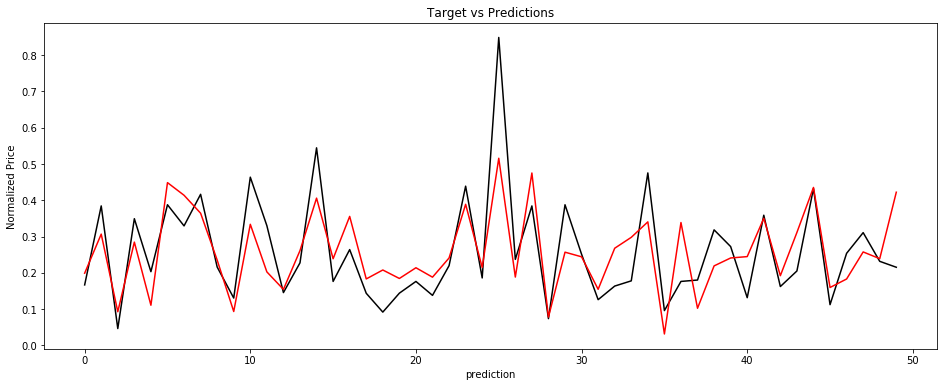

In [33]:
x_ax = range(50)
index = random.sample(range(1,len(test_tar)), 50)
samp_test = test_tar[index]
samp_pred = predictions[index]

ax = plt.figure(figsize=(16, 6)).gca() # define axis
plt.plot(samp_test, c='k')
plt.plot(samp_pred, c='r')

ax.set_title('Target vs Predictions') # Give the plot a main title
ax.set_ylabel('Normalized Price')# Set text for y axis
ax.set_xlabel('prediction')
plt.show()

In [34]:
max_price = max(good_housing["price"])
min_price = min(good_housing["price"])

denorm_pred = samp_pred * (max_price - min_price) + min_price
denorm_tar = samp_test * (max_price - min_price) + min_price

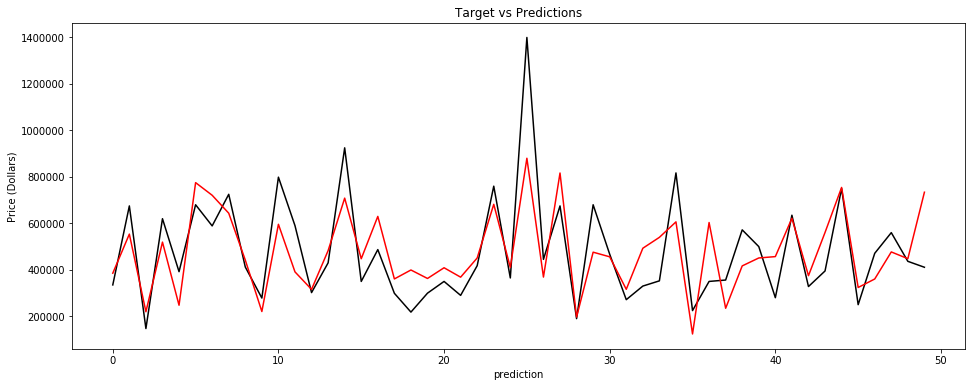

In [35]:
x_ax = range(50)
index = random.sample(range(1,len(test_tar)), 50)
samp_test = test_tar[index]
samp_pred = predictions[index]

ax = plt.figure(figsize=(16, 6)).gca() # define axis
plt.plot(denorm_tar, c='k')
plt.plot(denorm_pred, c='r')

ax.set_title('Target vs Predictions') # Give the plot a main title
ax.set_ylabel('Price (Dollars)')# Set text for y axis
ax.set_xlabel('prediction')
plt.show()

# See conclusions at the top!